In [9]:
import os

from easyInterface.Diffraction.Calculators import CryspyCalculator
from easyInterface.Diffraction.Interface import CalculatorInterface
! pip install matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 13.1 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 4.7 MB/s  eta 0:00:01
     |████████████████████████████████| 67 kB 3.3 MB/s  eta 0:00:01


# The Caclculator

Create a calculator instance from an input file 

In [10]:
main_rcif = os.path.join('PbSO4_powder-1d_neutrons-unpol_D1A(ILL)', 'main.cif')
calculator = CryspyCalculator(main_rcif)

This calculator object now contains the calculator object and all relevent interfacing functions.
### Phases

In [11]:
phases = calculator.getPhases()
print(phases['PbSO4'])
print(list(phases['PbSO4']['atoms'].keys()))

SpaceGroup: P n m a  abc  
Cell: (a:8.477926 ang, b:5.396823 ang, c:6.958096 ang, alpha:90.0 deg, beta:90.0 deg, gamma:90.0 deg) 
5 Atoms

['Pb', 'S', 'O1', 'O2', 'O3']


### Experiments

In [12]:
experiments = calculator.getExperiments()
print(experiments)

1 Experiments


In [13]:
print(experiments['pd']['measured_pattern'].isPolarised)

False


### Calculations

In [14]:
calculations = calculator.getCalculations()

In [15]:
pattern = calculations['pd']['calculated_pattern']
measured = experiments['pd']['measured_pattern']

### Plotting data

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

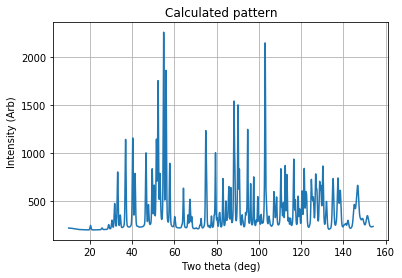

In [17]:
fig, ax = plt.subplots()
ax.plot(pattern['x'], pattern['y_calc'])
ax.set(xlabel='Two theta (deg)', ylabel='Intensity (Arb)', title='Calculated pattern')
ax.grid()

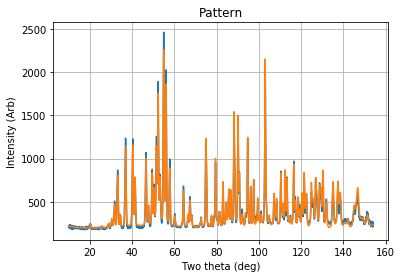

In [18]:
fig, ax = plt.subplots()
ax.plot(measured['x'], measured['y_obs'])
ax.plot(pattern['x'], pattern['y_calc'])
ax.set(xlabel='Two theta (deg)', ylabel='Intensity (Arb)', title='Pattern')
ax.grid()

# Interfacing with the calculator

In [19]:
phase = phases['PbSO4']
print(phase['atoms']['Pb'])

Atom Pb : x = 0.18724 frac, y = 0.25 frac, z = 0.16615 frac


In [20]:
print(phase['atoms']['Pb']['fract_x'])

0.18724 frac


In [21]:
phase['atoms']['Pb']['fract_x'].value = 0.175

In [22]:
print(phase['atoms']['Pb']['fract_x'])

0.175 frac


Now we set the phase

In [23]:
calculator.setPhases(phases)

In [24]:
phaseUpdated = calculator.getPhases()

<string>:6: ComplexWarning: Casting complex values to real discards the imaginary part


In [25]:
print(phaseUpdated['PbSO4']['atoms']['Pb']['fract_x'])

0.175 frac


### Refinement

In [26]:
calculator.refine()

({'flag': True, 'res': None, 'chi_sq': 1206641.480605331, 'n': 2881.0}, None)

Since were not connected to the interface we don't know `res=None` is no free parameters

In [27]:
phase['atoms']['Pb']['fract_x'].refine = True
calculator.setPhases(phases)

In [28]:
calculator.refine()

Optimization terminated successfully.
         Current function value: 396.849282
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


({'flag': True, 'res':       fun: 396.8492815500138
   hess_inv: array([[1.13495945e-05]])
        jac: array([-7.62939453e-06])
    message: 'Optimization terminated successfully.'
       nfev: 21
        nit: 4
       njev: 7
     status: 0
    success: True
          x: array([0.2853253])},       fun: 396.8492815500138
  hess_inv: array([[1.13495945e-05]])
       jac: array([-7.62939453e-06])
   message: 'Optimization terminated successfully.'
      nfev: 21
       nit: 4
      njev: 7
    status: 0
   success: True
         x: array([0.2853253]))

# The Interface

This allows a conversion from the calculator API to a project file

In [29]:
interface = CalculatorInterface(calculator)
print(interface)

easyInterface (0.0.4) with calculator: CrysPy - 0.2.0


Get a phase

In [30]:
phase = interface.getPhase('PbSO4')
print(phase)

SpaceGroup: P n m a  abc  
Cell: (a:8.477926 ang, b:5.396823 ang, c:6.958096 ang, alpha:90.0 deg, beta:90.0 deg, gamma:90.0 deg) 
5 Atoms



Add a phase

In [31]:
phase['phasename'] = 'PbSO5'
interface.addPhase(phase)

In [32]:
phases = interface.project_dict['phases']

In [33]:
print(phases)

2 Phases


Remove a phase

In [34]:
interface.removePhase('PbSO5')
phases = interface.project_dict['phases']

In [35]:
print(phases)

1 Phases


## Refinement

In [36]:
interface.setPhaseRefine('PbSO4', ['atoms', 'Pb', 'fract_x'], 0.175)
interface.setPhaseRefine('PbSO4', ['atoms', 'Pb', 'fract_x'], True)
interface.refine()

Optimization terminated successfully.
         Current function value: 396.849282
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3


{'num_refined_parameters': 1,
 'refinement_message': 'Optimization terminated successfully.',
 'nfev': 9,
 'nit': 1,
 'njev': 3,
 'final_chi_sq': 396.8492815500138}

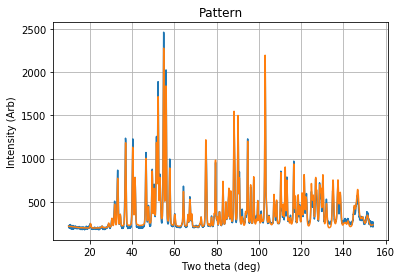

In [37]:
calculations = interface.getCalculation('pd')
experiment = interface.getExperiment('pd')
pattern = calculations['calculated_pattern']
measured = experiment['measured_pattern']

fig, ax = plt.subplots()
ax.plot(measured['x'], measured['y_obs'])
ax.plot(pattern['x'], pattern['y_calc'])
ax.set(xlabel='Two theta (deg)', ylabel='Intensity (Arb)', title='Pattern')
ax.grid()

## Units

Get an item.

In [38]:
item = interface.getDictByPath(['phases','PbSO4','cell','length_a'])
print(item)

8.477926 ang


In [40]:
item.unitConversionFactor('cm')

1e-08

In [43]:
item.convertUnits('m')

KeyError: 'value'